In [14]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from os.path import join, exists

In [25]:
parameter_summary

Param name  Param value_Nocarb  Param value_Inulin  Param value_Laminarin  \
0           PJ            0.189945            0.237690               0.188439   
1           BV            0.259485            0.459773               0.242321   
2           AC            0.158704            0.470608               0.207367   
3           DP            0.192311            0.192119               0.232801   
4           BT            0.217288            0.472563               0.188358   
..         ...                 ...                 ...                    ...   
105      EL*DL            0.024057           -0.067835              -0.011486   
106      EL*BH            0.358449            0.091178              -0.072055   
107      EL*BP            0.113633            0.008762              -0.235447   
108      EL*CS            0.079912            0.062831              -0.066917   
109      EL*EL           -1.637977           -1.352495              -1.402201   

     Param value_Xylan    Median   Std_dev  
0             0.254899  0.213818  0.033714  
1             0.368903  0.314194  0.101632  
2             0.193125  0.200246  0.143565  
3             0.245039  0.212556  0.027424  
4             0.405058  0.311173  0.139507  
..                 ...       ...       ...  
105           0.117464  0.006286  0.077766  
106           0.333196  0.212187  0.205518  
107          -0.179270 -0.085254  0.162480  
108          -0.112333 -0.002043  0.095039  
109          -1.121700 -1.377348  0.211749  

[110 rows x 7 columns]

In [15]:
parameter_summary = pd.read_csv('Parameters_summary.csv')
growth_AC = pd.read_csv(join('..', 'Data', 'Species', 'AC_growth_profile.csv'))
growth_AC = growth_AC[growth_AC['Comm'] == 'AC']
growth_24_AC = {
    'Inulin': growth_AC[(growth_AC['Treatments'] == 'Inulin') & (growth_AC['Time'] == 24.0)]['AC'].values[0],
    'Laminarin': growth_AC[(growth_AC['Treatments'] == 'Laminarin') & (growth_AC['Time'] == 24.0)]['AC'].values[0],
    'Xylan': growth_AC[(growth_AC['Treatments'] == 'Xylan') & (growth_AC['Time'] == 24.0)]['AC'].values[0],
    'NoCarb': growth_AC[(growth_AC['Treatments'] == 'No Carb') & (growth_AC['Time'] == 24.0)]['AC'].values[0]
}


growth_BH = pd.read_csv(join('..', 'Data', 'Species', 'BH_growth_profile.csv'))
growth_BH = growth_BH[growth_BH['Comm'] == 'BH']
growth_24_BH = {
    'Inulin': growth_BH[(growth_BH['Treatments'] == 'Inulin') & (growth_BH['Time'] == 24.0)]['BH'].values[0],
    'Laminarin': growth_BH[(growth_BH['Treatments'] == 'Laminarin') & (growth_BH['Time'] == 24.0)]['BH'].values[0],
    'Xylan': growth_BH[(growth_BH['Treatments'] == 'Xylan') & (growth_BH['Time'] == 24.0)]['BH'].values[0],
    'NoCarb': growth_BH[(growth_BH['Treatments'] == 'No Carb') & (growth_BH['Time'] == 24.0)]['BH'].values[0]
}

growth_BP = pd.read_csv(join('..', 'Data', 'Species', 'BP_growth_profile.csv'))
growth_BP = growth_BP[growth_BP['Comm'] == 'BP']
growth_24_BP = {
    'Inulin': growth_BP[(growth_BP['Treatments'] == 'Inulin') & (growth_BP['Time'] == 24.0)]['BP'].values[0],
    'Laminarin': growth_BP[(growth_BP['Treatments'] == 'Laminarin') & (growth_BP['Time'] == 24.0)]['BP'].values[0],
    'Xylan': growth_BP[(growth_BP['Treatments'] == 'Xylan') & (growth_BP['Time'] == 24.0)]['BP'].values[0],
    'NoCarb': growth_BP[(growth_BP['Treatments'] == 'No Carb') & (growth_BP['Time'] == 24.0)]['BP'].values[0]
}   

growth_BT = pd.read_csv(join('..', 'Data', 'Species', 'BT_growth_profile.csv'))
growth_BT = growth_BT[growth_BT['Comm'] == 'BT']
growth_24_BT = {
    'Inulin': growth_BT[(growth_BT['Treatments'] == 'Inulin') & (growth_BT['Time'] == 24.0)]['BT'].values[0],
    'Laminarin': growth_BT[(growth_BT['Treatments'] == 'Laminarin') & (growth_BT['Time'] == 24.0)]['BT'].values[0],
    'Xylan': growth_BT[(growth_BT['Treatments'] == 'Xylan') & (growth_BT['Time'] == 24.0)]['BT'].values[0],
    'NoCarb': growth_BT[(growth_BT['Treatments'] == 'No Carb') & (growth_BT['Time'] == 24.0)]['BT'].values[0]
}

growth_BV = pd.read_csv(join('..', 'Data', 'Species', 'BV_growth_profile.csv'))
growth_BV = growth_BV[growth_BV['Comm'] == 'BV']
growth_24_BV = {
    'Inulin': growth_BV[(growth_BV['Treatments'] == 'Inulin') & (growth_BV['Time'] == 24.0)]['BV'].values[0],
    'Laminarin': growth_BV[(growth_BV['Treatments'] == 'Laminarin') & (growth_BV['Time'] == 24.0)]['BV'].values[0],
    'Xylan': growth_BV[(growth_BV['Treatments'] == 'Xylan') & (growth_BV['Time'] == 24.0)]['BV'].values[0],
    'NoCarb': growth_BV[(growth_BV['Treatments'] == 'No Carb') & (growth_BV['Time'] == 24.0)]['BV'].values[0]
}

growth_CS = pd.read_csv(join('..', 'Data', 'Species', 'CS_growth_profile.csv'))
growth_CS = growth_CS[growth_CS['Comm'] == 'CS']
growth_24_CS = {
    'Inulin': growth_CS[(growth_CS['Treatments'] == 'Inulin') & (growth_CS['Time'] == 24.0)]['CS'].values[0],
    'Laminarin': growth_CS[(growth_CS['Treatments'] == 'Laminarin') & (growth_CS['Time'] == 24.0)]['CS'].values[0],
    'Xylan': growth_CS[(growth_CS['Treatments'] == 'Xylan') & (growth_CS['Time'] == 24.0)]['CS'].values[0],
    'NoCarb': growth_CS[(growth_CS['Treatments'] == 'No Carb') & (growth_CS['Time'] == 24.0)]['CS'].values[0]
}   

growth_DL = pd.read_csv(join('..', 'Data', 'Species', 'DL_growth_profile.csv'))
growth_DL = growth_DL[growth_DL['Comm'] == 'DL']
growth_24_DL = {
    'Inulin': growth_DL[(growth_DL['Treatments'] == 'Inulin') & (growth_DL['Time'] == 24.0)]['DL'].values[0],
    'Laminarin': growth_DL[(growth_DL['Treatments'] == 'Laminarin') & (growth_DL['Time'] == 24.0)]['DL'].values[0],
    'Xylan': growth_DL[(growth_DL['Treatments'] == 'Xylan') & (growth_DL['Time'] == 24.0)]['DL'].values[0],
    'NoCarb': growth_DL[(growth_DL['Treatments'] == 'No Carb') & (growth_DL['Time'] == 24.0)]['DL'].values[0]
}

growth_DP = pd.read_csv(join('..', 'Data', 'Species', 'DP_growth_profile.csv'))
growth_DP = growth_DP[growth_DP['Comm'] == 'DP']
growth_24_DP = {
    'Inulin': growth_DP[(growth_DP['Treatments'] == 'Inulin') & (growth_DP['Time'] == 24.0)]['DP'].values[0],
    'Laminarin': growth_DP[(growth_DP['Treatments'] == 'Laminarin') & (growth_DP['Time'] == 24.0)]['DP'].values[0],
    'Xylan': growth_DP[(growth_DP['Treatments'] == 'Xylan') & (growth_DP['Time'] == 24.0)]['DP'].values[0],
    'NoCarb': growth_DP[(growth_DP['Treatments'] == 'No Carb') & (growth_DP['Time'] == 24.0)]['DP'].values[0]
}   

growth_EL = pd.read_csv(join('..', 'Data', 'Species', 'EL_growth_profile.csv'))
growth_EL = growth_EL[growth_EL['Comm'] == 'EL']
growth_24_EL = {
    'Inulin': growth_EL[(growth_EL['Treatments'] == 'Inulin') & (growth_EL['Time'] == 24.0)]['EL'].values[0],
    'Laminarin': growth_EL[(growth_EL['Treatments'] == 'Laminarin') & (growth_EL['Time'] == 24.0)]['EL'].values[0],
    'Xylan': growth_EL[(growth_EL['Treatments'] == 'Xylan') & (growth_EL['Time'] == 24.0)]['EL'].values[0], 
    'NoCarb': growth_EL[(growth_EL['Treatments'] == 'No Carb') & (growth_EL['Time'] == 24.0)]['EL'].values[0]
}

growth_PJ = pd.read_csv(join('..', 'Data', 'Species', 'PJ_growth_profile.csv'))
growth_PJ = growth_PJ[growth_PJ['Comm'] == 'PJ']
growth_24_PJ = {
    'Inulin': growth_PJ[(growth_PJ['Treatments'] == 'Inulin') & (growth_PJ['Time'] == 24.0)]['PJ'].values[0],
    'Laminarin': growth_PJ[(growth_PJ['Treatments'] == 'Laminarin') & (growth_PJ['Time'] == 24.0)]['PJ'].values[0],
    'Xylan': growth_PJ[(growth_PJ['Treatments'] == 'Xylan') & (growth_PJ['Time'] == 24.0)]['PJ'].values[0],
    'NoCarb': growth_PJ[(growth_PJ['Treatments'] == 'No Carb') & (growth_PJ['Time'] == 24.0)]['PJ'].values[0]
}   

growth_dict = {
    'AC': growth_24_AC,
    'BH': growth_24_BH,
    'BP': growth_24_BP,
    'BT': growth_24_BT,
    'BV': growth_24_BV,
    'CS': growth_24_CS,
    'DL': growth_24_DL,
    'DP': growth_24_DP,
    'EL': growth_24_EL,
    'PJ': growth_24_PJ
}

0.136156620686452
0.044018313056653
0.0342256560308392
0.0810166747746082
0.0768466577373827
0.0879266041616793
0.1421044606648784
0.0202766989499196
0.1371435442012516
0.03000878474113


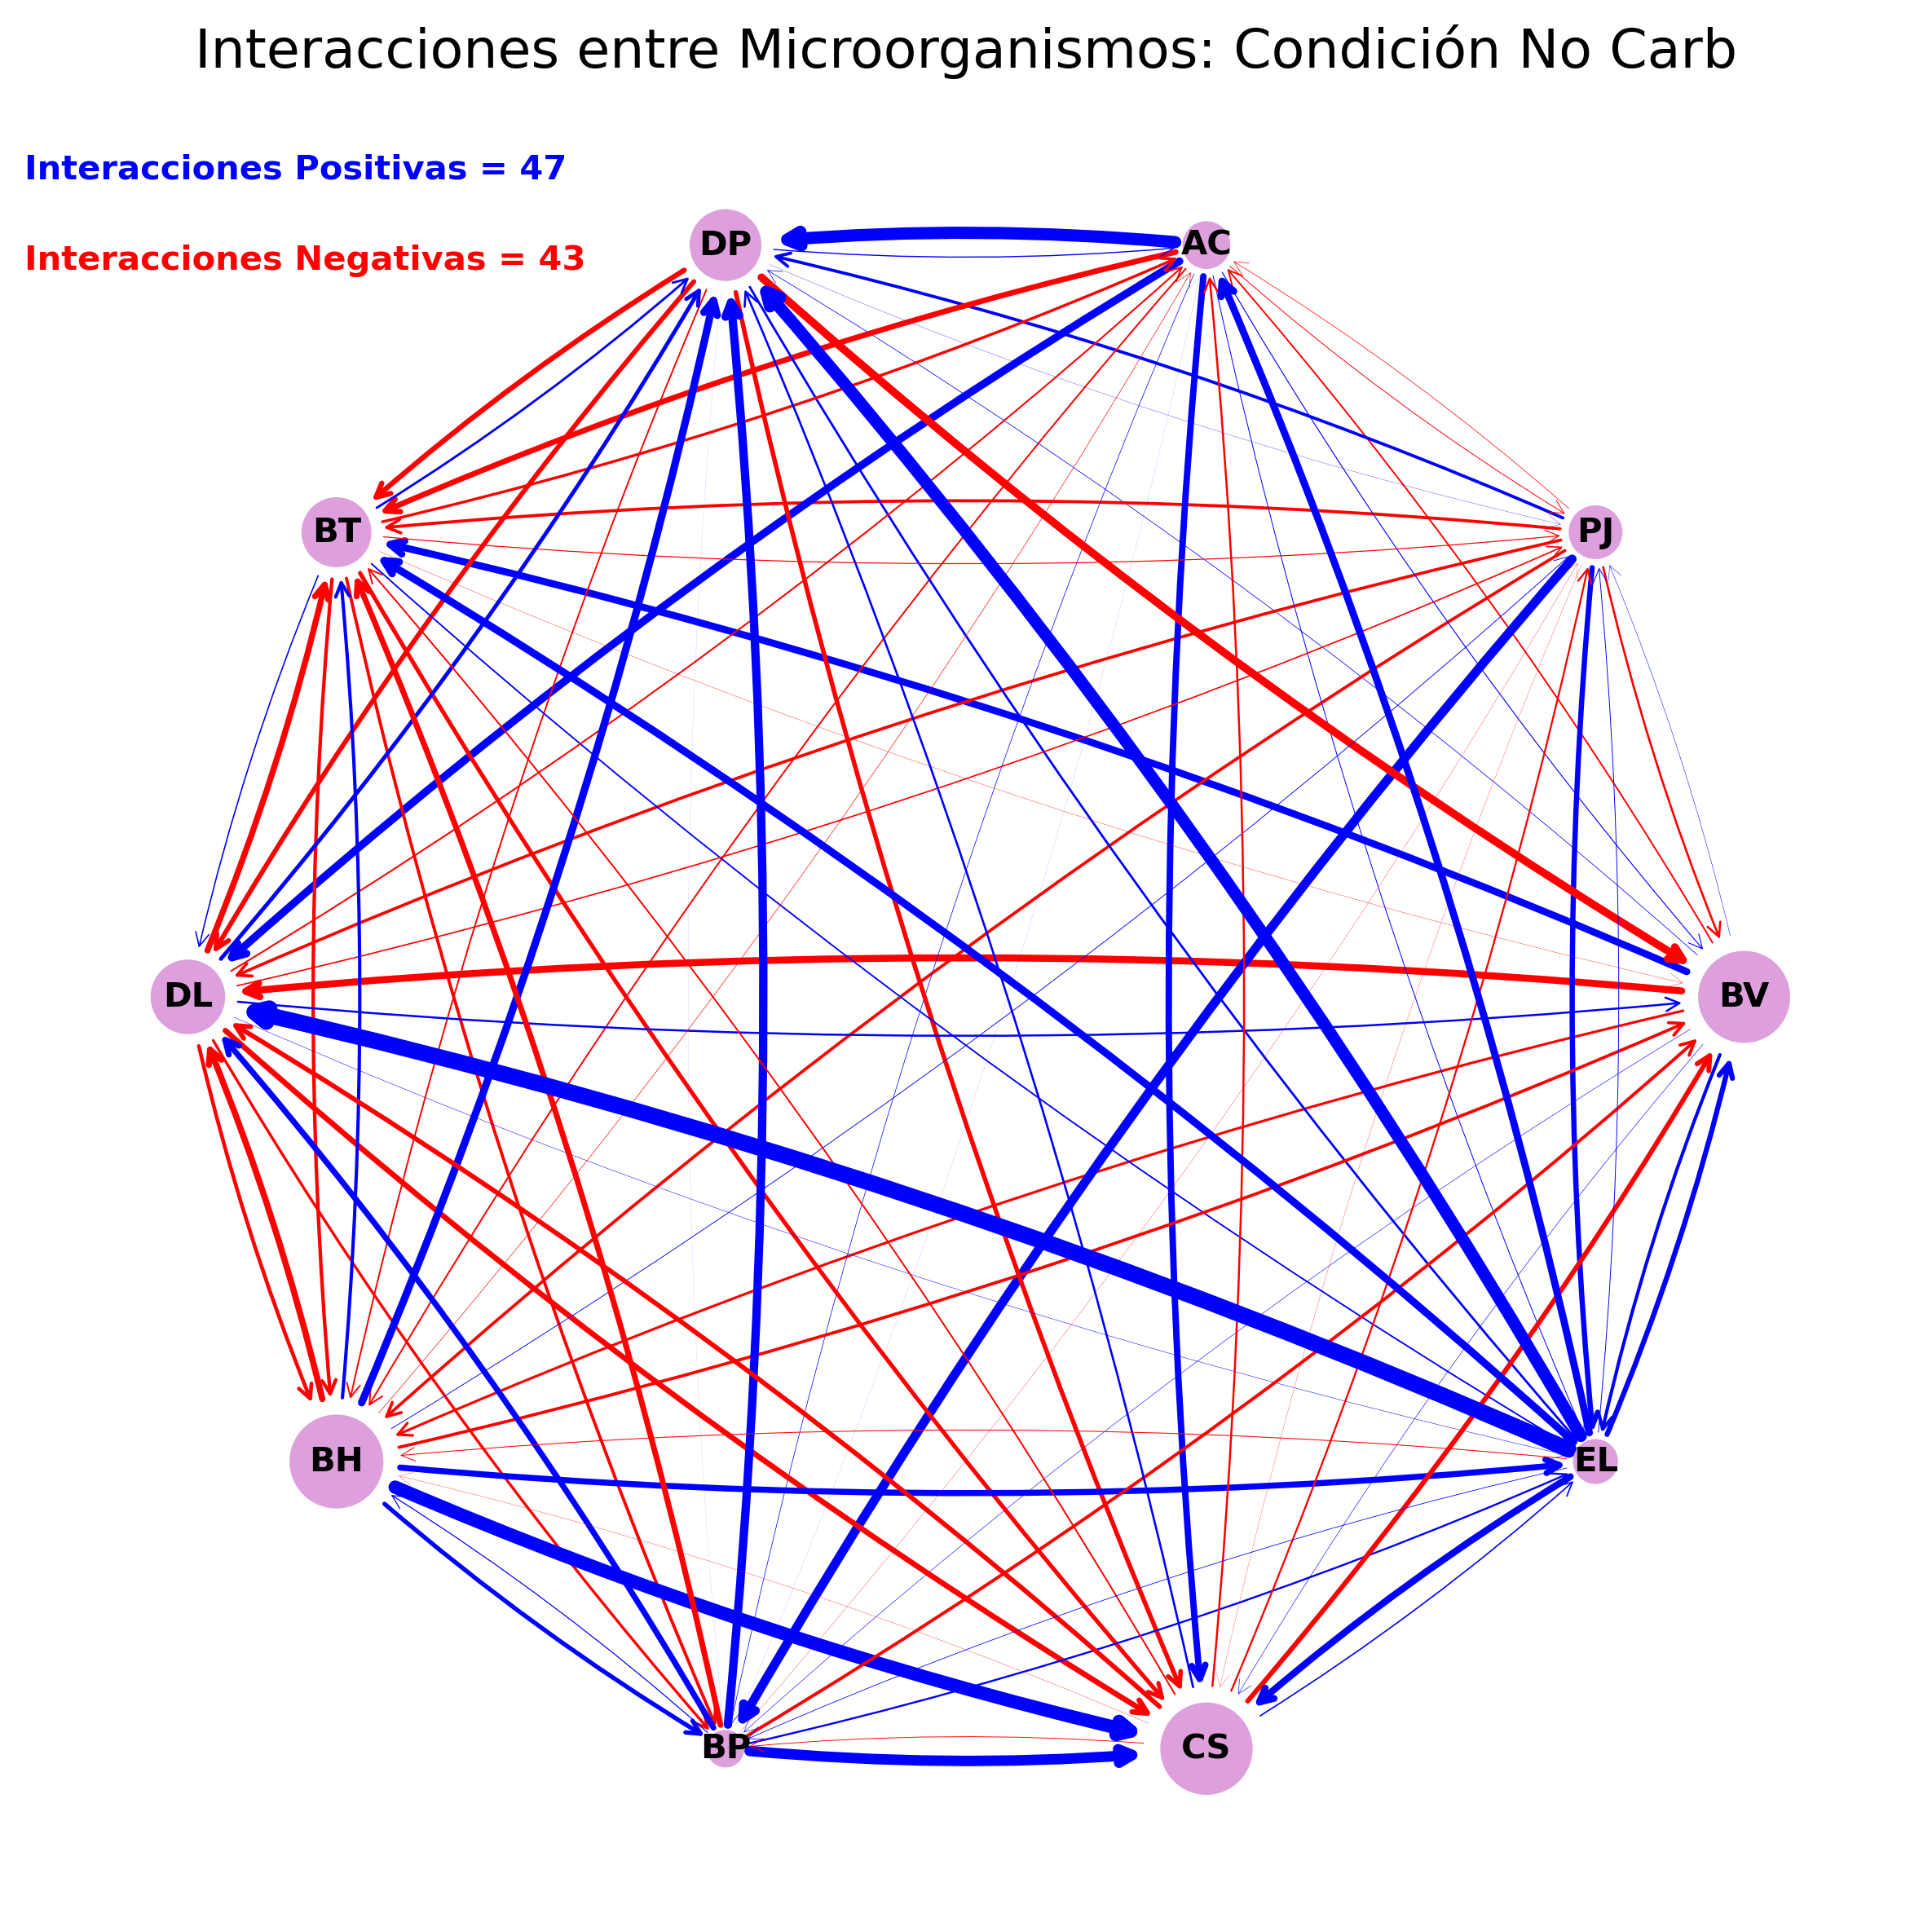

In [42]:
noncarb = parameter_summary[['Param name', 'Param value_Nocarb']].copy()
species = noncarb['Param name'].str.split('*', expand=True)
noncarb['S1'] = species.loc[:,0]
noncarb['S2'] = species.loc[:,1]
noncarb = noncarb[['S1', 'S2', 'Param value_Nocarb']].copy()
noncarb.columns = ['S1', 'S2', 'Value']
noncarb.dropna(inplace=True)
noncarb = noncarb[noncarb['S1'] != noncarb['S2']]

noncarb['Value'] = noncarb['Value'].astype(float)
# filter small values
noncarb_graph = noncarb[abs(noncarb['Value']) > 0.0].copy()

### Generate the network
G = nx.from_pandas_edgelist(noncarb_graph, 'S2', 'S1', ['Value'],
                            create_using=nx.DiGraph())

### Generate the adjacency matrix
fig, ax = plt.subplots(figsize=(8, 8), dpi = 300)

color_arrow = np.array([G[u][v]['Value'] > 0 for u, v in G.edges()]).astype(int)
color_arrow = np.where(color_arrow, 'blue', 'red')
# edge according to the value
edge_with = np.array([abs(G[u][v]['Value']) for u, v in G.edges()])
edge_with = edge_with*5

pos = nx.circular_layout(G)

for node in G.nodes():
    node_name = node
    node_growth = growth_dict[node_name[0:2]]['NoCarb']
    print(node_growth)
    G.nodes[node]['growth'] = node_growth

nodes_sizes = [G.nodes[node]['growth']*5000 for node in G.nodes()]

nx.draw_networkx_nodes(G, pos=pos, node_size=nodes_sizes,
                       ax=ax,
                       node_color = 'plum')
nx.draw_networkx_edges(G, pos=pos, edge_color=color_arrow, width = edge_with,
                       edge_cmap=plt.cm.coolwarm, ax=ax, node_size = [n*2 for n in nodes_sizes],
                       arrows=True, arrowstyle='->',
                       connectionstyle='arc3,rad=0.05')

nx.draw_networkx_labels(G, pos=pos, font_size=10, font_color='black', ax=ax,
                        font_family='sans-serif', font_weight='bold')

plt.axis('off')
plt.annotate(f'Interacciones Positivas = {len(noncarb[noncarb["Value"] > 0])}',
             xy=(0.0, 0.95), xycoords='axes fraction', fontsize=10, color='blue', weight='bold',)
plt.annotate(f'Interacciones Negativas = {len(noncarb[noncarb["Value"] < 0])}',
             xy=(0.0, 0.90), xycoords='axes fraction', fontsize=10, color='red', weight='bold',)

plt.title('Interacciones entre Microorganismos: Condición No Carb', fontsize=16)
plt.tight_layout()
plt.show()



1.3211689949725476
0.2138555524592451
0.5460462542380754
0.1147623276550436
0.9579903627328038
0.7183450606102828
0.2690247171838895
0.6873421602787455
0.2531440295388047
0.1474586527293844


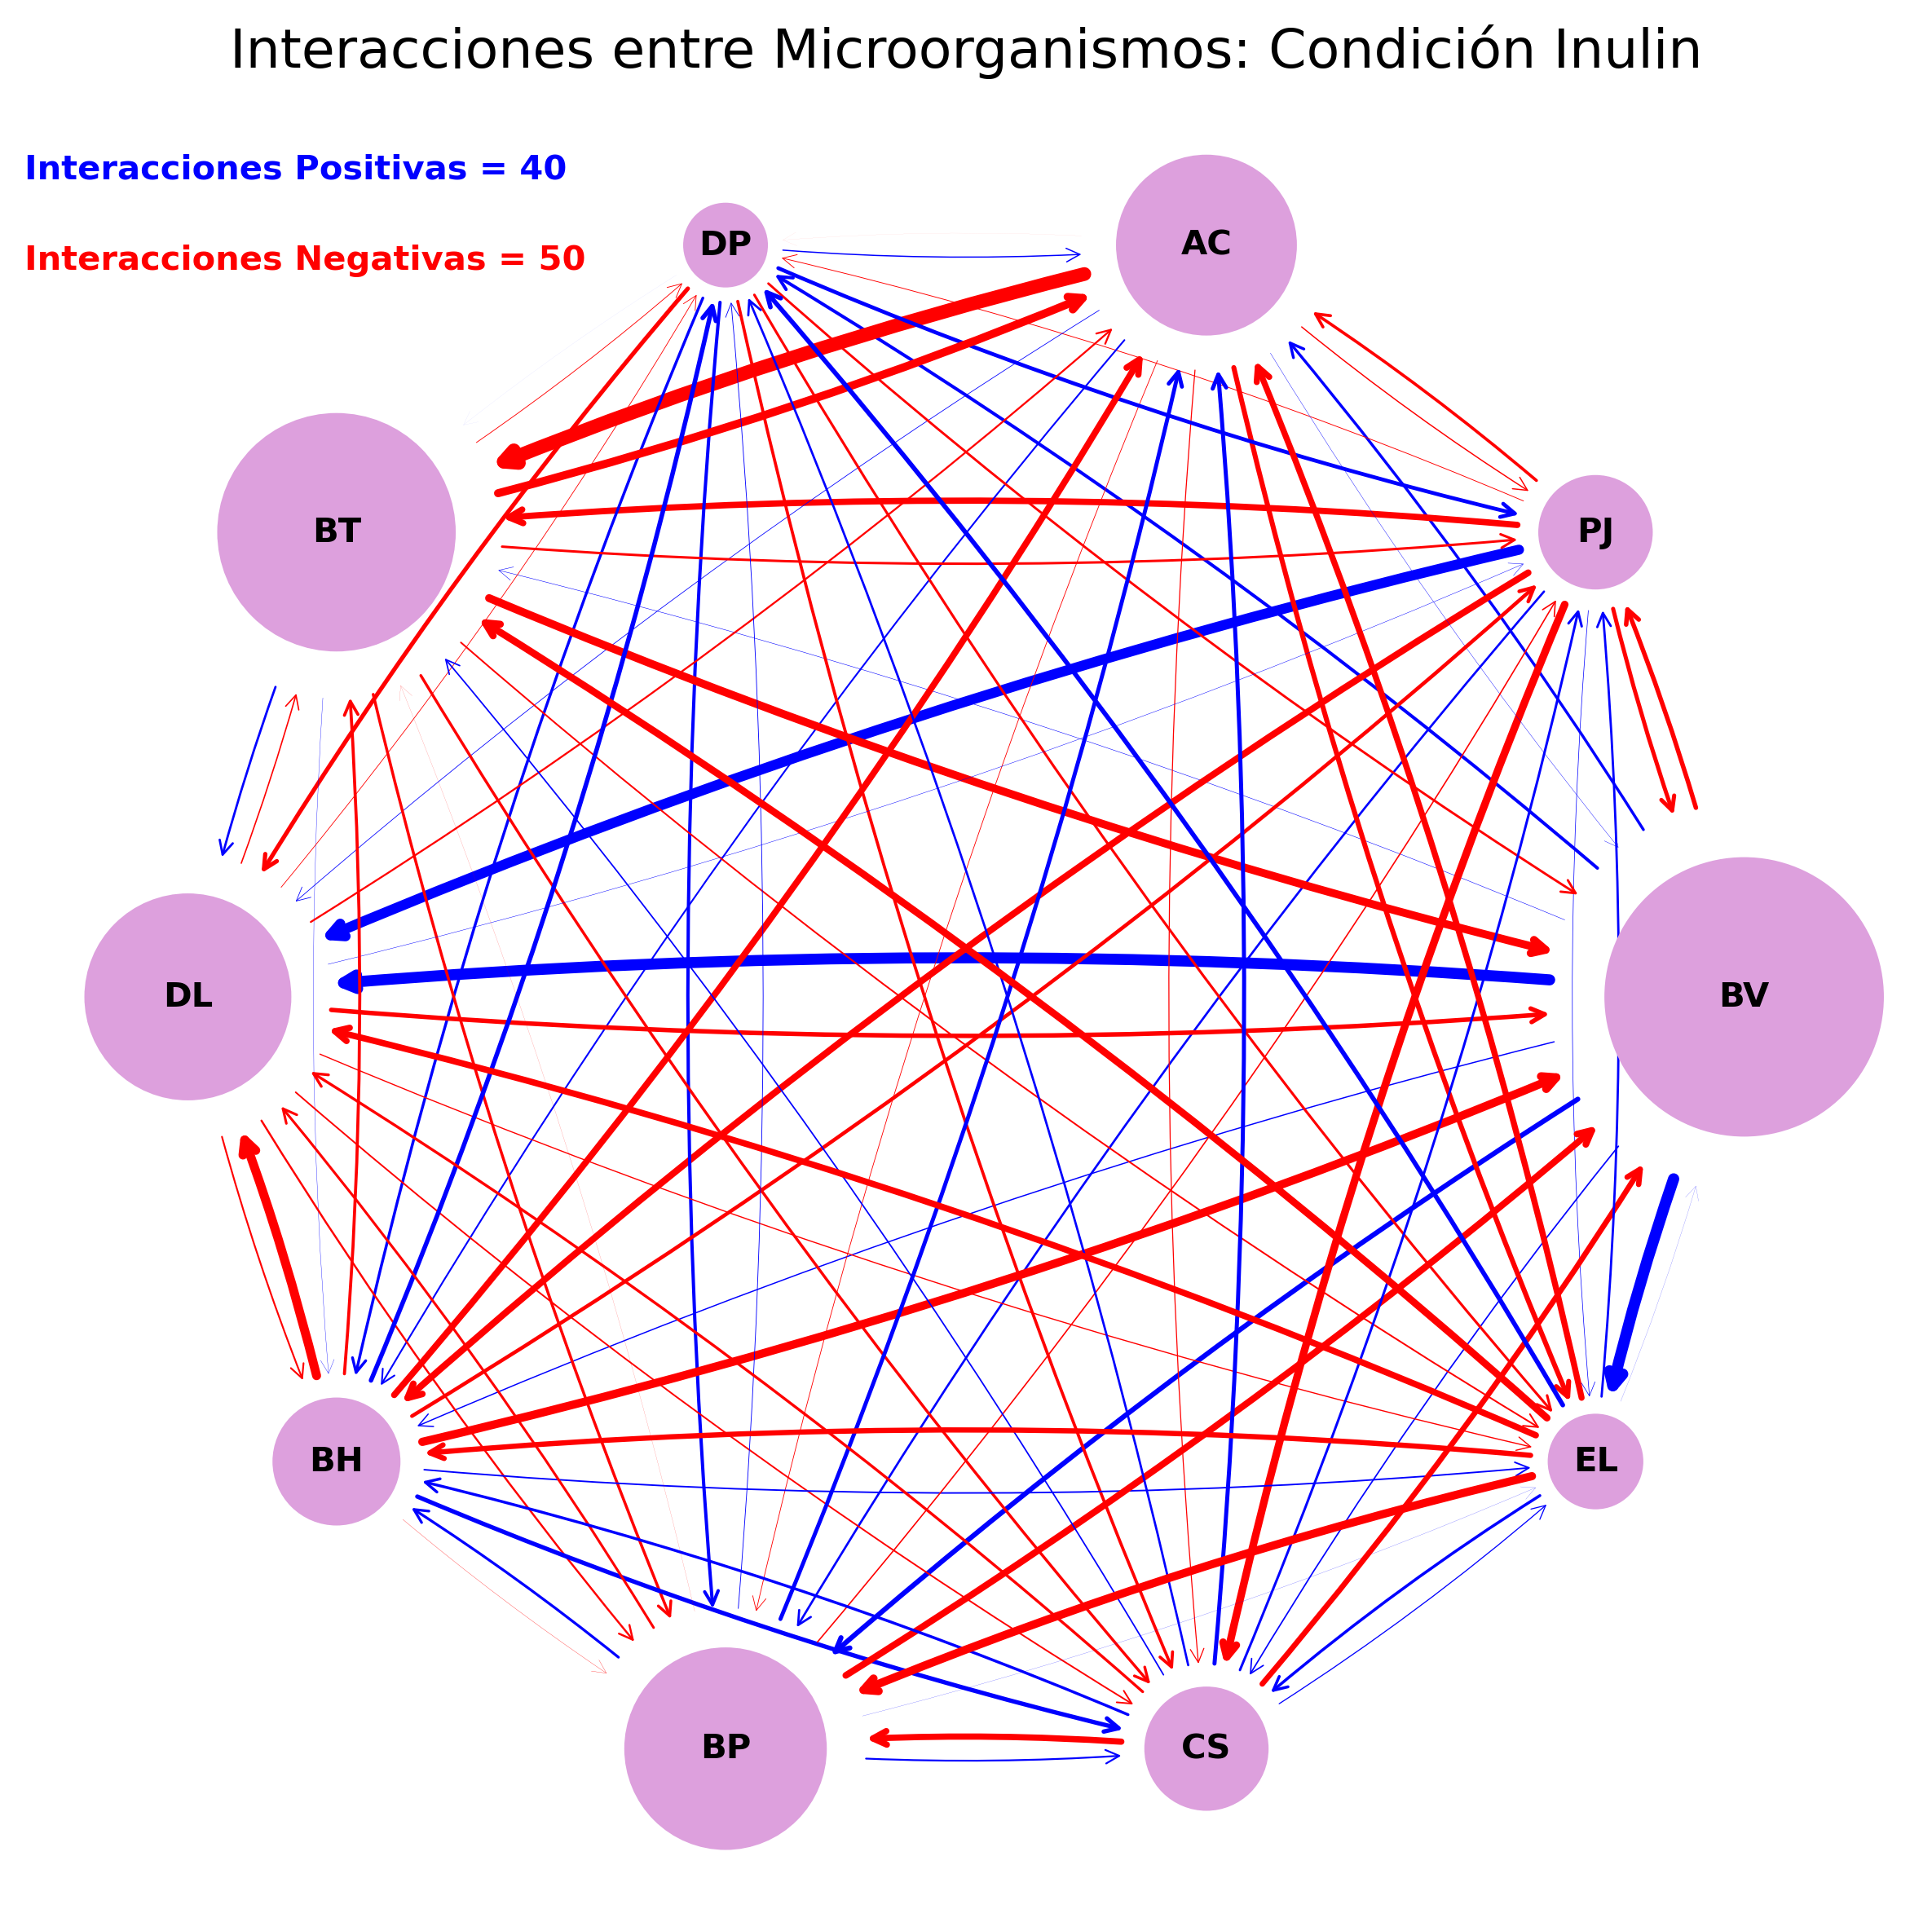

In [43]:
inulin = parameter_summary[['Param name', 'Param value_Inulin']].copy()
species = inulin['Param name'].str.split('*', expand=True)
inulin['S1'] = species.loc[:,0]
inulin['S2'] = species.loc[:,1]
inulin = inulin[['S1', 'S2', 'Param value_Inulin']].copy()
inulin.columns = ['S1', 'S2', 'Value']
inulin.dropna(inplace=True)
inulin = inulin[inulin['S1'] != inulin['S2']]

inulin['Value'] = inulin['Value'].astype(float)
# filter small values
inulin_graph = inulin[abs(inulin['Value']) > 0.0].copy()

### Generate the network
G = nx.from_pandas_edgelist(inulin_graph, 'S2', 'S1', ['Value'],
                            create_using=nx.DiGraph())

### Generate the adjacency matrix
fig, ax = plt.subplots(figsize=(8, 8), dpi = 300)

color_arrow = np.array([G[u][v]['Value'] > 0 for u, v in G.edges()]).astype(int)
color_arrow = np.where(color_arrow, 'blue', 'red')
# edge according to the value
edge_with = np.array([abs(G[u][v]['Value']) for u, v in G.edges()])
edge_with = edge_with*5

pos = nx.circular_layout(G)

for node in G.nodes():
    node_name = node
    node_growth = growth_dict[node_name[0:2]]['Inulin']
    print(node_growth)
    G.nodes[node]['growth'] = node_growth

nodes_sizes = [G.nodes[node]['growth']*5000 for node in G.nodes()]

nx.draw_networkx_nodes(G, pos=pos, node_size=nodes_sizes,
                       ax=ax,
                       node_color = 'plum')
nx.draw_networkx_edges(G, pos=pos, edge_color=color_arrow, width = edge_with,
                       edge_cmap=plt.cm.coolwarm, ax=ax, node_size = [n*2 for n in nodes_sizes],
                       arrows=True, arrowstyle='->',
                       connectionstyle='arc3,rad=0.05')

nx.draw_networkx_labels(G, pos=pos, font_size=10, font_color='black', ax=ax,
                        font_family='sans-serif', font_weight='bold')

plt.axis('off')
plt.annotate(f'Interacciones Positivas = {len(inulin[inulin["Value"] > 0])}',
             xy=(0.0, 0.95), xycoords='axes fraction', fontsize=10, color='blue', weight='bold',)
plt.annotate(f'Interacciones Negativas = {len(inulin[inulin["Value"] < 0])}',
             xy=(0.0, 0.90), xycoords='axes fraction', fontsize=10, color='red', weight='bold',)

plt.title('Interacciones entre Microorganismos: Condición Inulin', fontsize=16)
plt.tight_layout()
plt.show()

0.0984765272335864
0.0531897837483065
0.0624147368909943
0.1173894240673894
0.1231185301182075
0.1079351009387928
0.1384679856950446
0.0281369624105708
0.162858094080793
0.1486569105691056


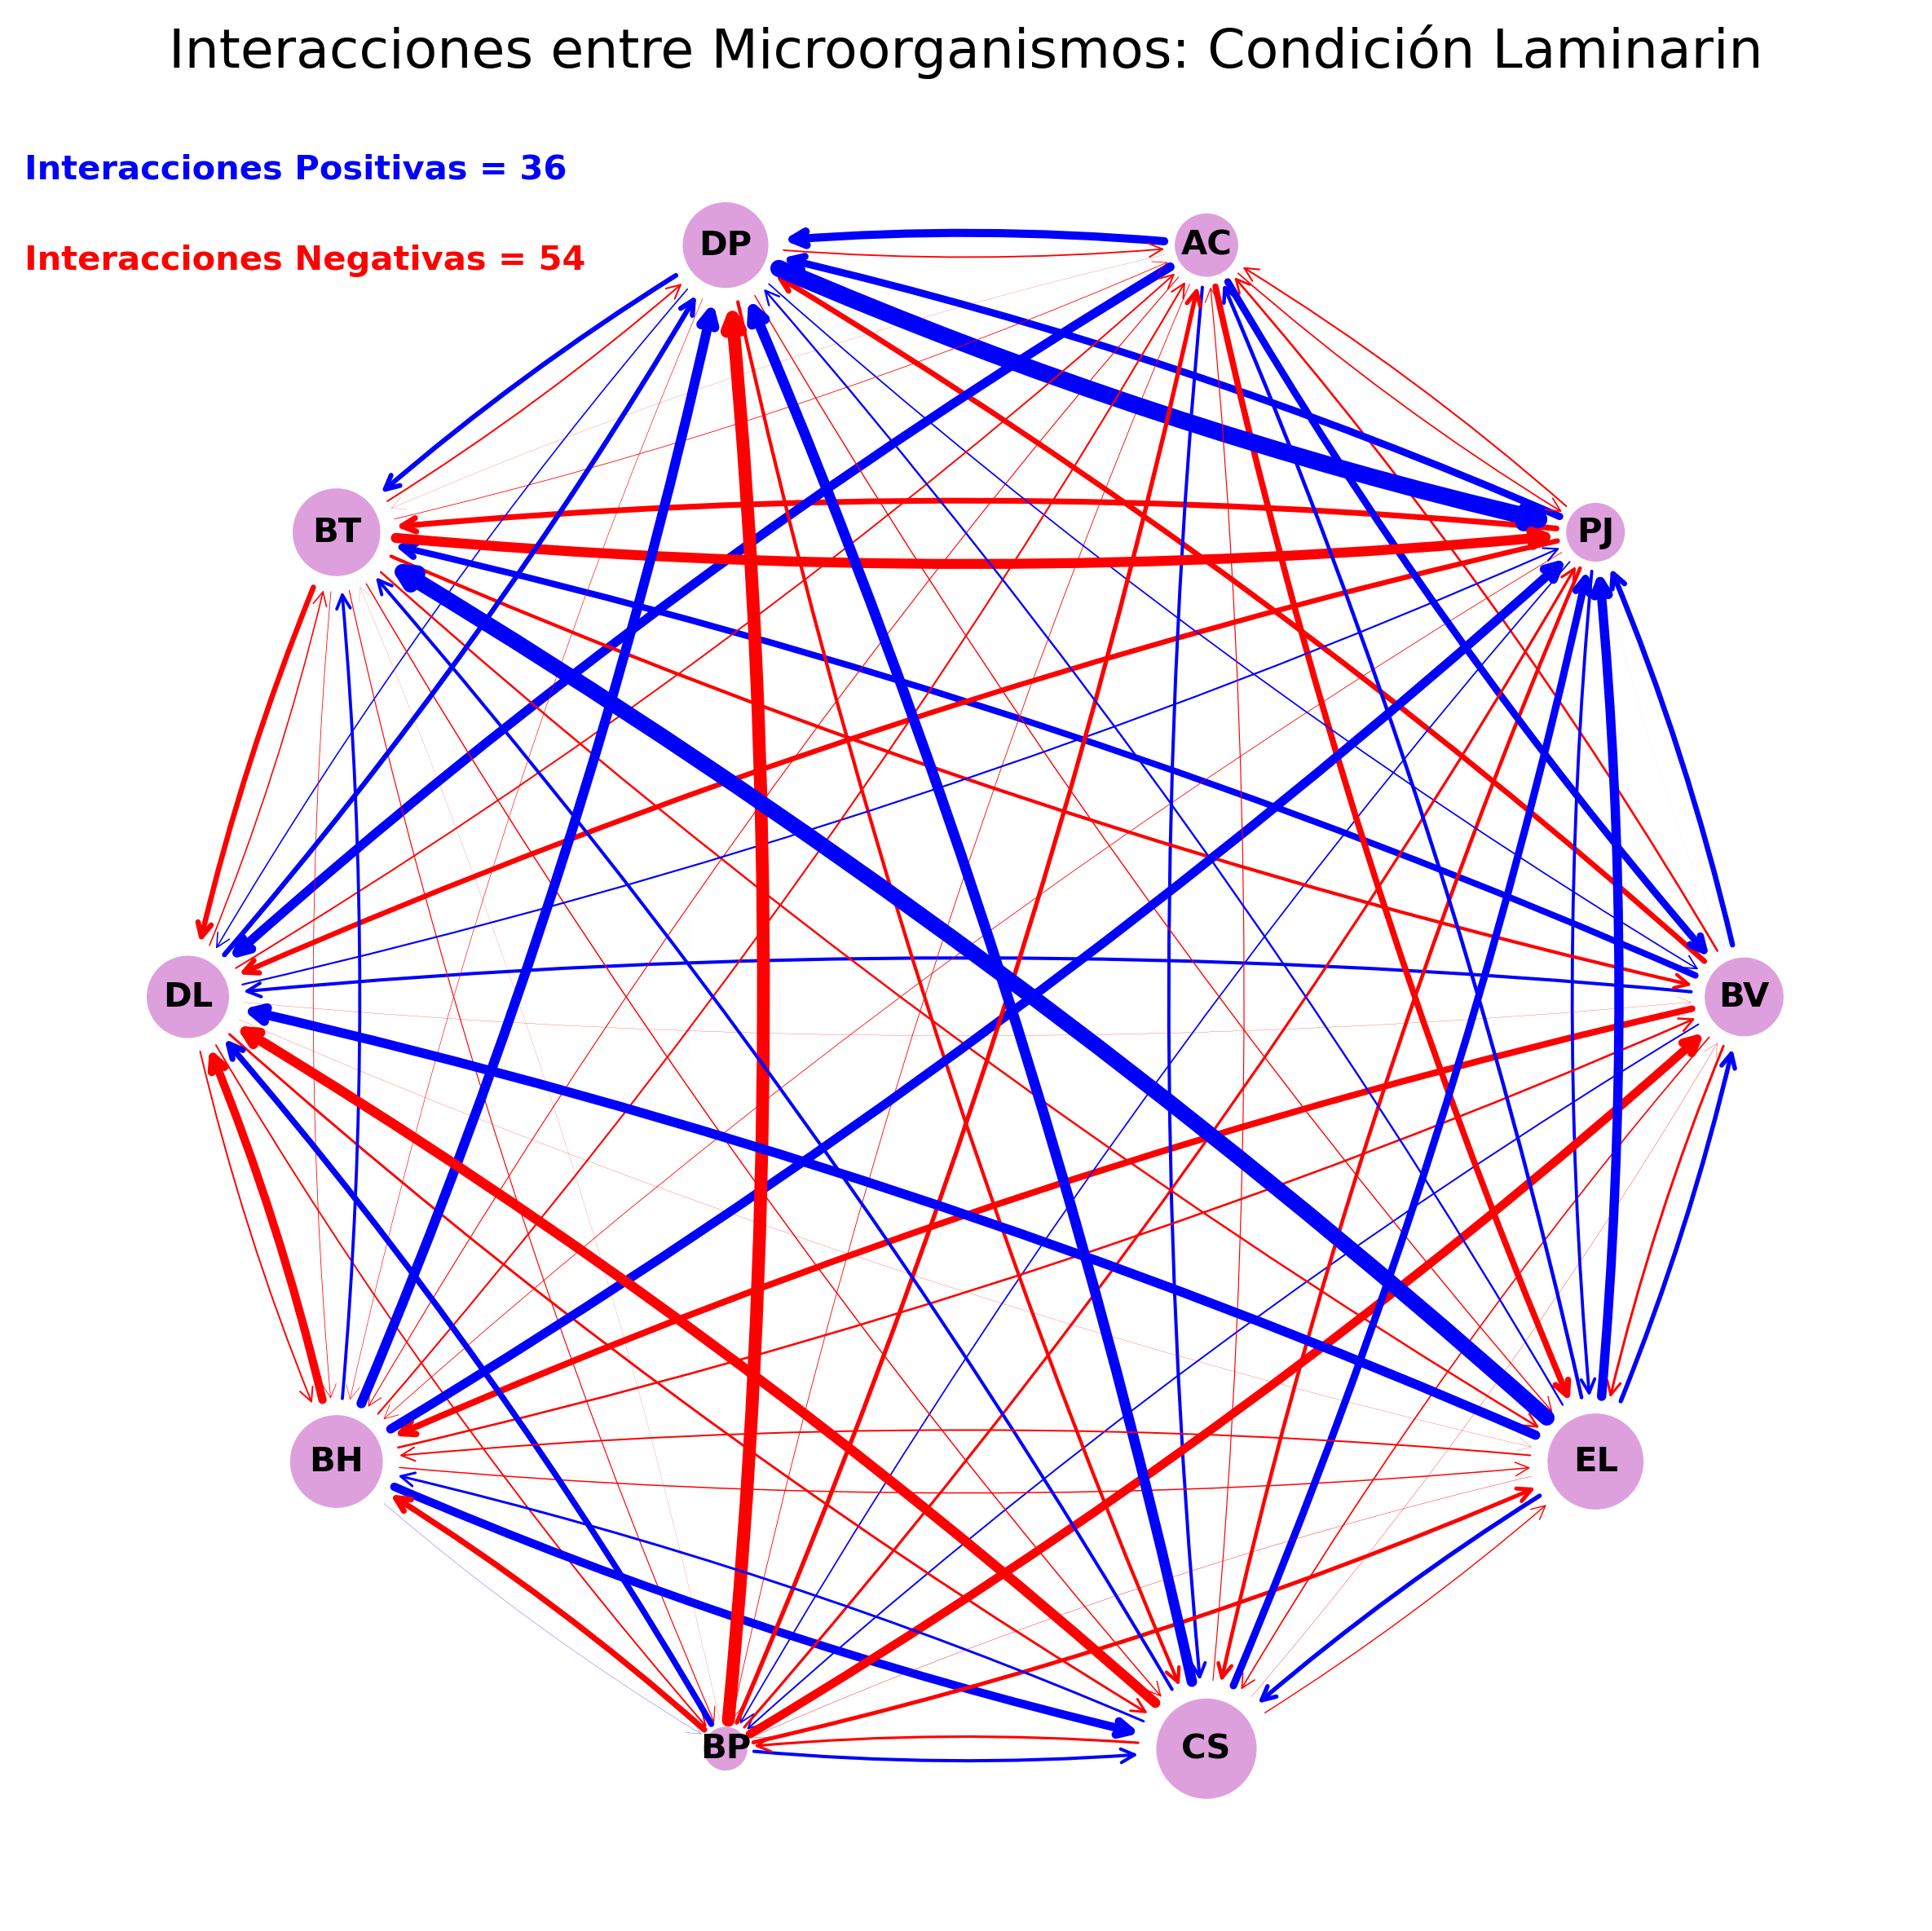

In [44]:
laminarin = parameter_summary[['Param name', 'Param value_Laminarin']].copy()
species = laminarin['Param name'].str.split('*', expand=True)
laminarin['S1'] = species.loc[:,0]
laminarin['S2'] = species.loc[:,1]
laminarin = laminarin[['S1', 'S2', 'Param value_Laminarin']].copy()
laminarin.columns = ['S1', 'S2', 'Value']
laminarin.dropna(inplace=True)
laminarin = laminarin[laminarin['S1'] != laminarin['S2']]

laminarin['Value'] = laminarin['Value'].astype(float)
# filter small values
laminarin_graph = laminarin[abs(laminarin['Value']) > 0.0].copy()

### Generate the network
G = nx.from_pandas_edgelist(laminarin_graph, 'S2', 'S1', ['Value'],
                            create_using=nx.DiGraph())

### Generate the adjacency matrix
fig, ax = plt.subplots(figsize=(8, 8), dpi = 300)

color_arrow = np.array([G[u][v]['Value'] > 0 for u, v in G.edges()]).astype(int)
color_arrow = np.where(color_arrow, 'blue', 'red')
# edge according to the value
edge_with = np.array([abs(G[u][v]['Value']) for u, v in G.edges()])
edge_with = edge_with*5

pos = nx.circular_layout(G)

for node in G.nodes():
    node_name = node
    node_growth = growth_dict[node_name[0:2]]['Laminarin']
    print(node_growth)
    G.nodes[node]['growth'] = node_growth

nodes_sizes = [G.nodes[node]['growth']*5000 for node in G.nodes()]

nx.draw_networkx_nodes(G, pos=pos, node_size=nodes_sizes,
                       ax=ax,
                       node_color = 'plum')
nx.draw_networkx_edges(G, pos=pos, edge_color=color_arrow, width = edge_with,
                       edge_cmap=plt.cm.coolwarm, ax=ax, node_size = [n*2 for n in nodes_sizes],
                       arrows=True, arrowstyle='->',
                       connectionstyle='arc3,rad=0.05')

nx.draw_networkx_labels(G, pos=pos, font_size=10, font_color='black', ax=ax,
                        font_family='sans-serif', font_weight='bold')

plt.axis('off')
plt.annotate(f'Interacciones Positivas = {len(laminarin[laminarin["Value"] > 0])}',
             xy=(0.0, 0.95), xycoords='axes fraction', fontsize=10, color='blue', weight='bold',)
plt.annotate(f'Interacciones Negativas = {len(laminarin[laminarin["Value"] < 0])}',
             xy=(0.0, 0.90), xycoords='axes fraction', fontsize=10, color='red', weight='bold',)

plt.title('Interacciones entre Microorganismos: Condición Laminarin', fontsize=16)
plt.tight_layout()
plt.show()

0.2608333983558589
0.0569424979696014
0.0520212391435604
0.1597691522835931
0.1655395762069375
0.1721742139241094
0.2086354582284002
0.051275774240327
0.177920087315963
0.1680979834877124


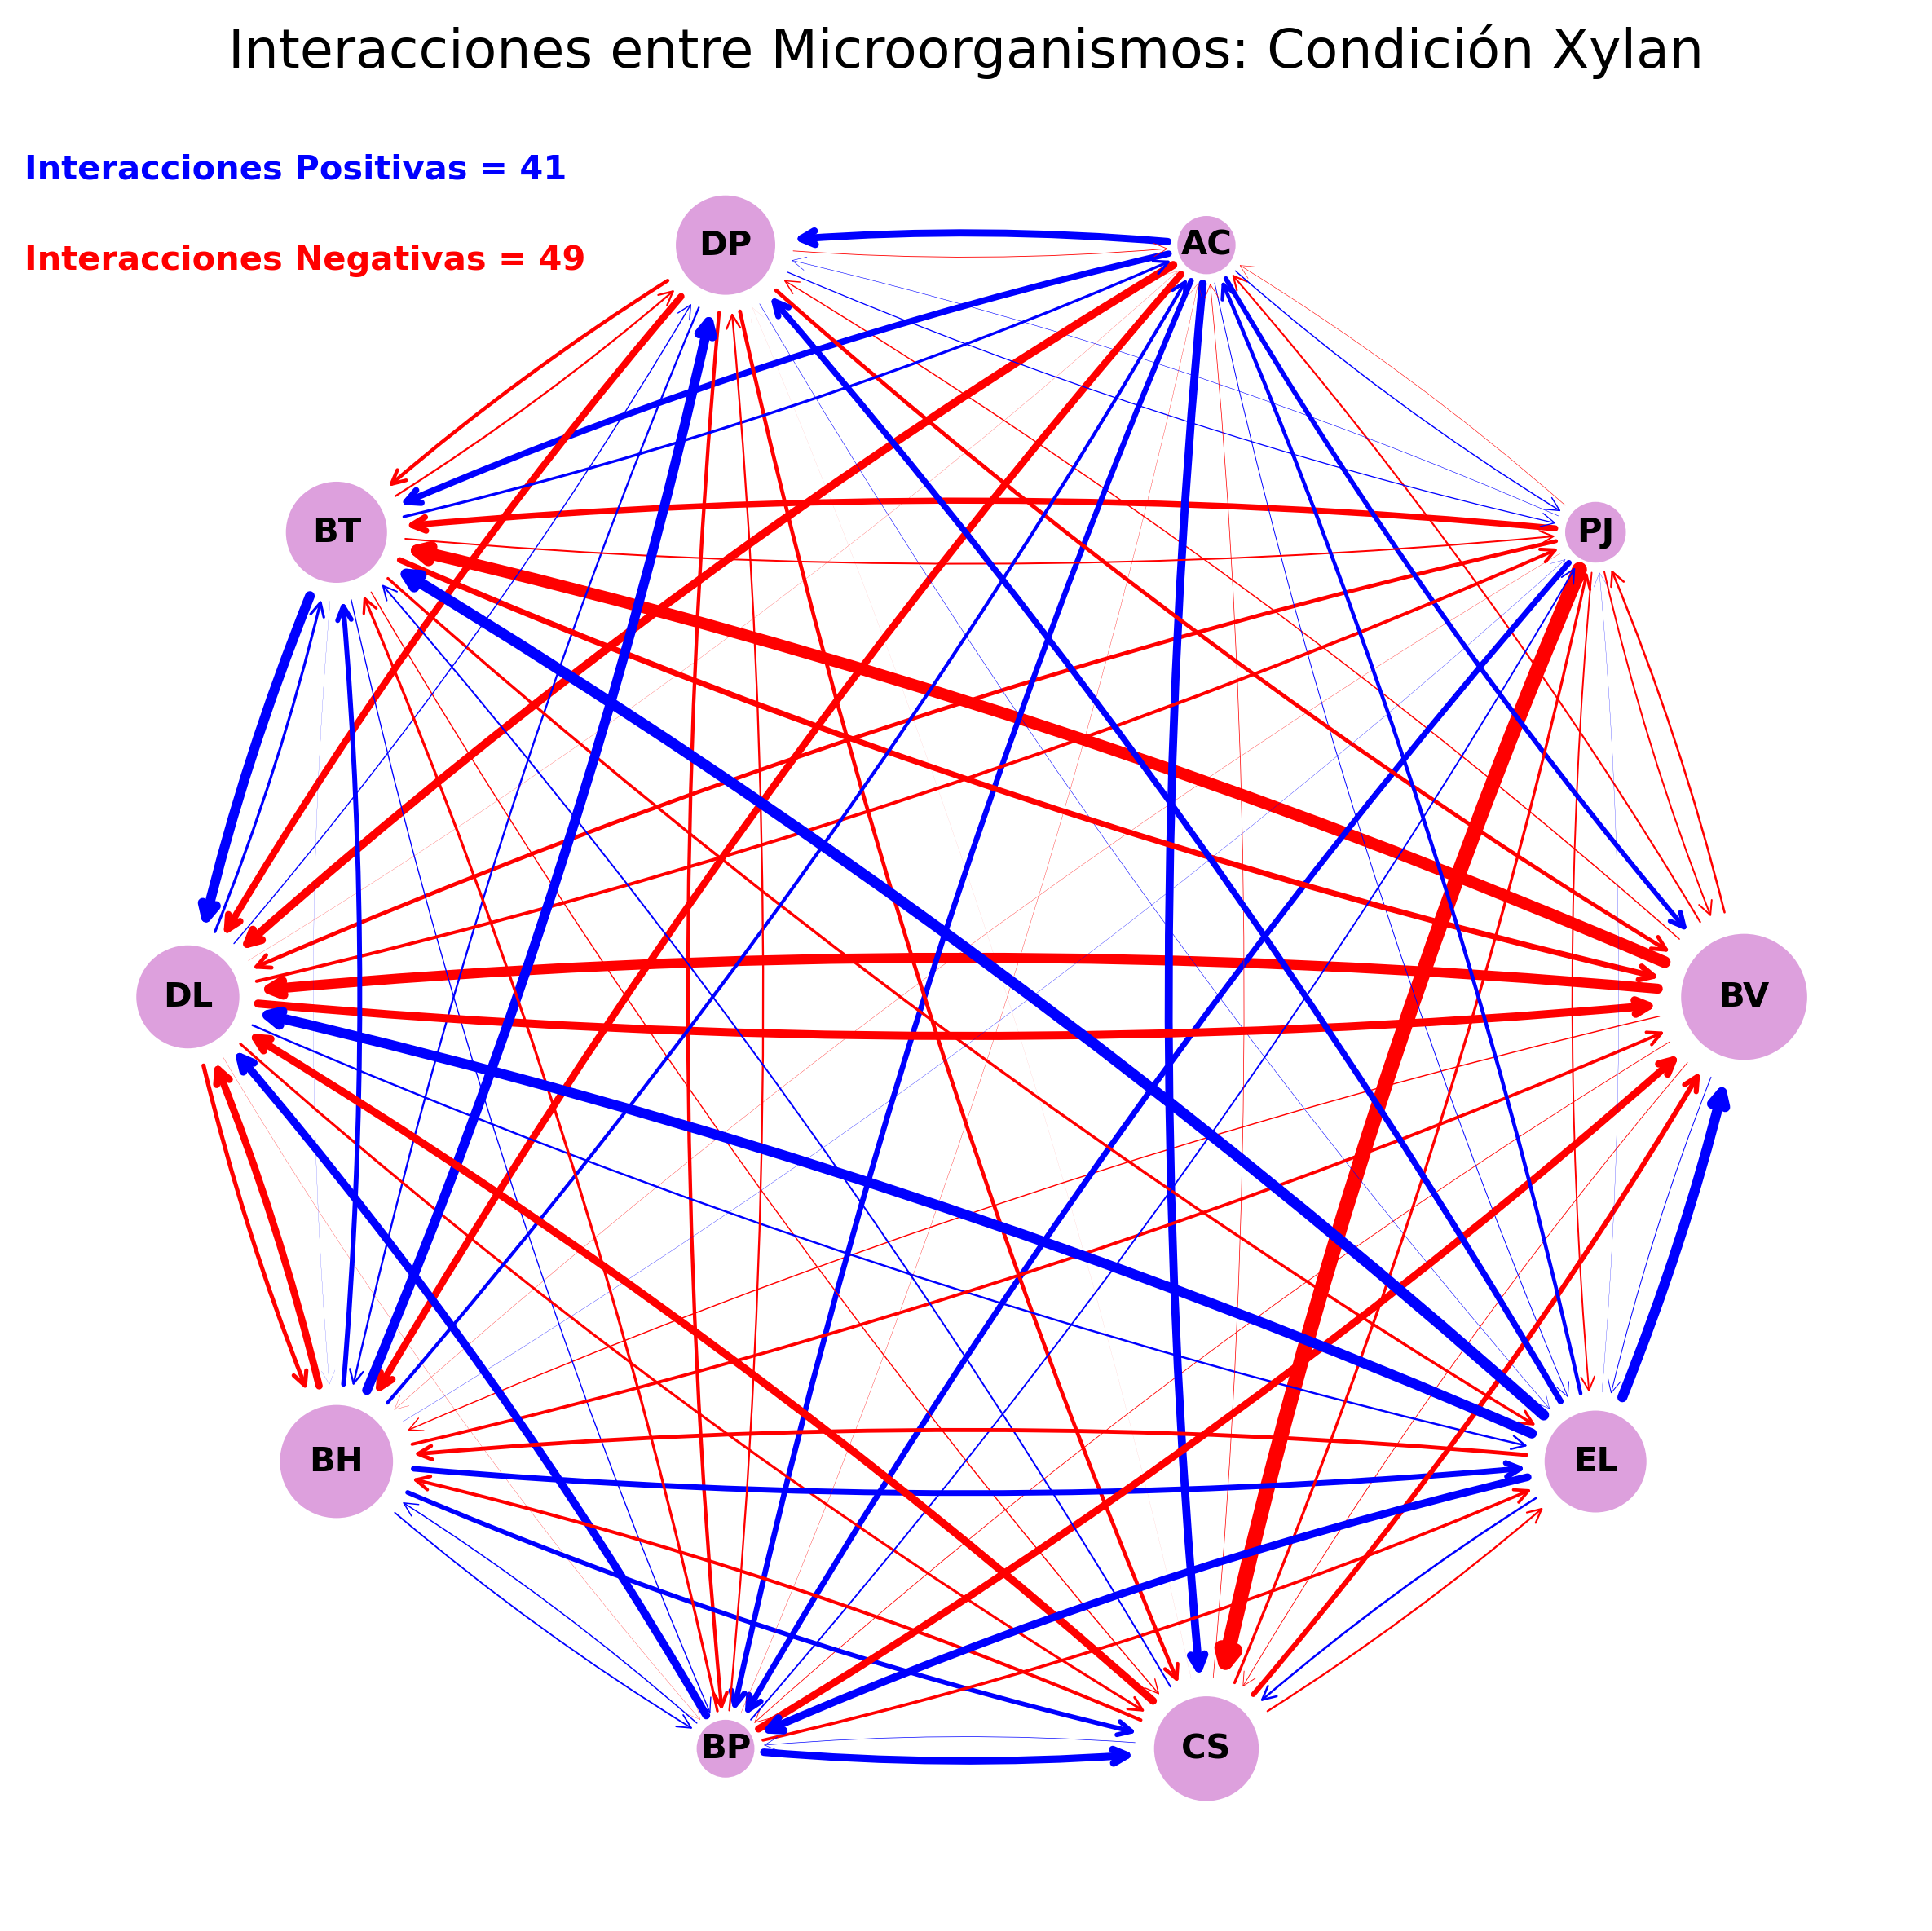

In [45]:
xylan = parameter_summary[['Param name', 'Param value_Xylan']].copy()
species = xylan['Param name'].str.split('*', expand=True)
xylan['S1'] = species.loc[:,0]
xylan['S2'] = species.loc[:,1]
xylan = xylan[['S1', 'S2', 'Param value_Xylan']].copy()
xylan.columns = ['S1', 'S2', 'Value']
xylan.dropna(inplace=True)
xylan = xylan[xylan['S1'] != xylan['S2']]

xylan['Value'] = xylan['Value'].astype(float)
# filter small values
xylan_graph = xylan[abs(xylan['Value']) > 0.0].copy()

### Generate the network
G = nx.from_pandas_edgelist(xylan_graph, 'S2', 'S1', ['Value'],
                            create_using=nx.DiGraph())

### Generate the adjacency matrix
fig, ax = plt.subplots(figsize=(8, 8), dpi = 300)

color_arrow = np.array([G[u][v]['Value'] > 0 for u, v in G.edges()]).astype(int)
color_arrow = np.where(color_arrow, 'blue', 'red')
# edge according to the value
edge_with = np.array([abs(G[u][v]['Value']) for u, v in G.edges()])
edge_with = edge_with*5

pos = nx.circular_layout(G)

for node in G.nodes():
    node_name = node
    node_growth = growth_dict[node_name[0:2]]['Xylan']
    print(node_growth)
    G.nodes[node]['growth'] = node_growth

nodes_sizes = [G.nodes[node]['growth']*5000 for node in G.nodes()]

nx.draw_networkx_nodes(G, pos=pos, node_size=nodes_sizes,
                       ax=ax,
                       node_color = 'plum')
nx.draw_networkx_edges(G, pos=pos, edge_color=color_arrow, width = edge_with,
                       edge_cmap=plt.cm.coolwarm, ax=ax, node_size = [n*2 for n in nodes_sizes],
                       arrows=True, arrowstyle='->',
                       connectionstyle='arc3,rad=0.05')

nx.draw_networkx_labels(G, pos=pos, font_size=10, font_color='black', ax=ax,
                        font_family='sans-serif', font_weight='bold')

plt.axis('off')
plt.annotate(f'Interacciones Positivas = {len(xylan[xylan["Value"] > 0])}',
             xy=(0.0, 0.95), xycoords='axes fraction', fontsize=10, color='blue', weight='bold',)
plt.annotate(f'Interacciones Negativas = {len(xylan[xylan["Value"] < 0])}',
             xy=(0.0, 0.90), xycoords='axes fraction', fontsize=10, color='red', weight='bold',)

plt.title('Interacciones entre Microorganismos: Condición Xylan', fontsize=16)
plt.tight_layout()
plt.show()

In [21]:
import scipy.stats as stats
parameter_values = [noncarb['Value'].values, inulin['Value'].values,
                    laminarin['Value'].values, xylan['Value'].values]
kurskal = stats.kruskal(*parameter_values)
print(f'Kruskal-Wallis H-test: H-statistic = {kurskal.statistic}, p-value = {kurskal.pvalue}')

Kruskal-Wallis H-test: H-statistic = 3.8226223453368675, p-value = 0.28126571542128886


In [22]:
params = noncarb.copy()
params['Inulin'] = inulin['Value'].values
params['Laminarin'] = laminarin['Value'].values
params['Xylan'] = xylan['Value'].values
params = params[['S1', 'S2', 'Value', 'Inulin', 'Laminarin', 'Xylan']].copy()
params.columns = ['S1', 'S2', 'NoCarb', 'Inulin', 'Laminarin', 'Xylan']
params['inter'] = params['S1'] + '->' + params['S2']

In [23]:
for index in params.index:
    val_nocarbon = params.loc[index, 'NoCarb']
    val_inulin = params.loc[index, 'Inulin']
    val_laminarin = params.loc[index, 'Laminarin']
    val_xylan = params.loc[index, 'Xylan']
    
    if val_nocarbon > 0 and val_inulin > 0 and val_laminarin > 0 and val_xylan > 0:
        params.loc[index, 'Type'] = 'Positive'
    elif val_nocarbon < 0 and val_inulin < 0 and val_laminarin < 0 and val_xylan < 0:
        params.loc[index, 'Type'] = 'Negative'
    else:
        ### biggest difference
        max_val = max(val_nocarbon, val_inulin, val_laminarin, val_xylan)
        min_val = min(val_nocarbon, val_inulin, val_laminarin, val_xylan)
        diff = max_val - min_val
        if diff > 0.5:
            params.loc[index, 'Type'] = 'Mixed'
        else:
            params.loc[index, 'Type'] = 'Uncertain'



In [62]:
# plot of interactions
fig, ax = plt.subplots(figsize=(27.5, 7.5), dpi = 600, constrained_layout=True)
# increase the font
plt.rcParams.update({'font.size': 16})

params = params.sort_values(by='inter')
ax.scatter(params['inter'], params['NoCarb'], marker='o', linestyle='', color='blue', label='No Carb', alpha=0.5, s = 50)
ax.scatter(params['inter'], params['Inulin'], marker='o', linestyle='', color='red', label='Inulin', alpha=0.5, s = 50)
ax.scatter(params['inter'], params['Laminarin'], marker='o', linestyle='', color='green', label='Laminarin', alpha=0.5, s = 50)
ax.scatter(params['inter'], params['Xylan'], marker='o', linestyle='', color='orange', label='Xylan', alpha=0.5, s = 50)
# set of those who change sign in blod
ax.set_xticks(params['inter'])
ax.set_xticklabels(params['inter'], rotation=90)

ax.scatter(params[params['Type'] == 'Mixed']['inter'],[-1] * len(params[params['Type'] == 'Mixed']['inter']), 
           color='purple', linewidth=0.5, linestyle='--', label='Efecto dependiente del contexto ',
           marker='*', s=100, edgecolor='black', zorder=5)

ax.set_xlabel('Interacciones entre Microorganismos')
ax.set_ylabel('Fuerza de Interacción')

ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.legend(bbox_to_anchor=(1., 1), loc='upper left')
